# Filtro passa-banda CRRC

**Informazioni generali.** Realizzazione pratica e misure relative a un filtro passa banda

Dettagli del setup:
* Filtri CR ed RC in serie realizzati in maniera tale da avere frequenze di taglio ben separate
* Simulazione tramite software Tina
* Misure tramite AD2

### Misura componenti
Si e' iniziato assemblando il circuito e misurando i valori effettivi dei vari componenti tramite Multimetro BK392. Per ottenere un condensatore di capacità simile a $ 110\;nF $ si è sfruttata una serie di due diversi condensatori da $ 220\;nF $.

| Componente | Misura |
| :-: | :-: |
| R1 | $ 100.28 \pm 0.40 \, k\Omega $ |
| R2 | $ 995.9 \pm 4.0 \, \Omega $ |
| C1 | $ 109.9 \pm 4.3 \, nF $ |
| C2 | $ 54.03 \pm 1.72 \, nF $ |


### Simulazione numerica
Si è successivamente calcolati i parametri della funzione di trasferimento $ \mathcal{H} = \frac{ \mathcal{j}\omega \tau_{1} } { (1 + \mathcal{j}\omega \tau_A)(1 + \mathcal{j}\omega \tau_B) }  $ con $ \tau_1 = R1C1 $, una volta ottenute delle espressioni per $ \tau_A $ e $ \tau_B $ si sono usate queste ultime per simulare una risposta tramite matlab, la quale viene riportata di seguito, come si vede risulta corretto il risultato con radice negativa.





0


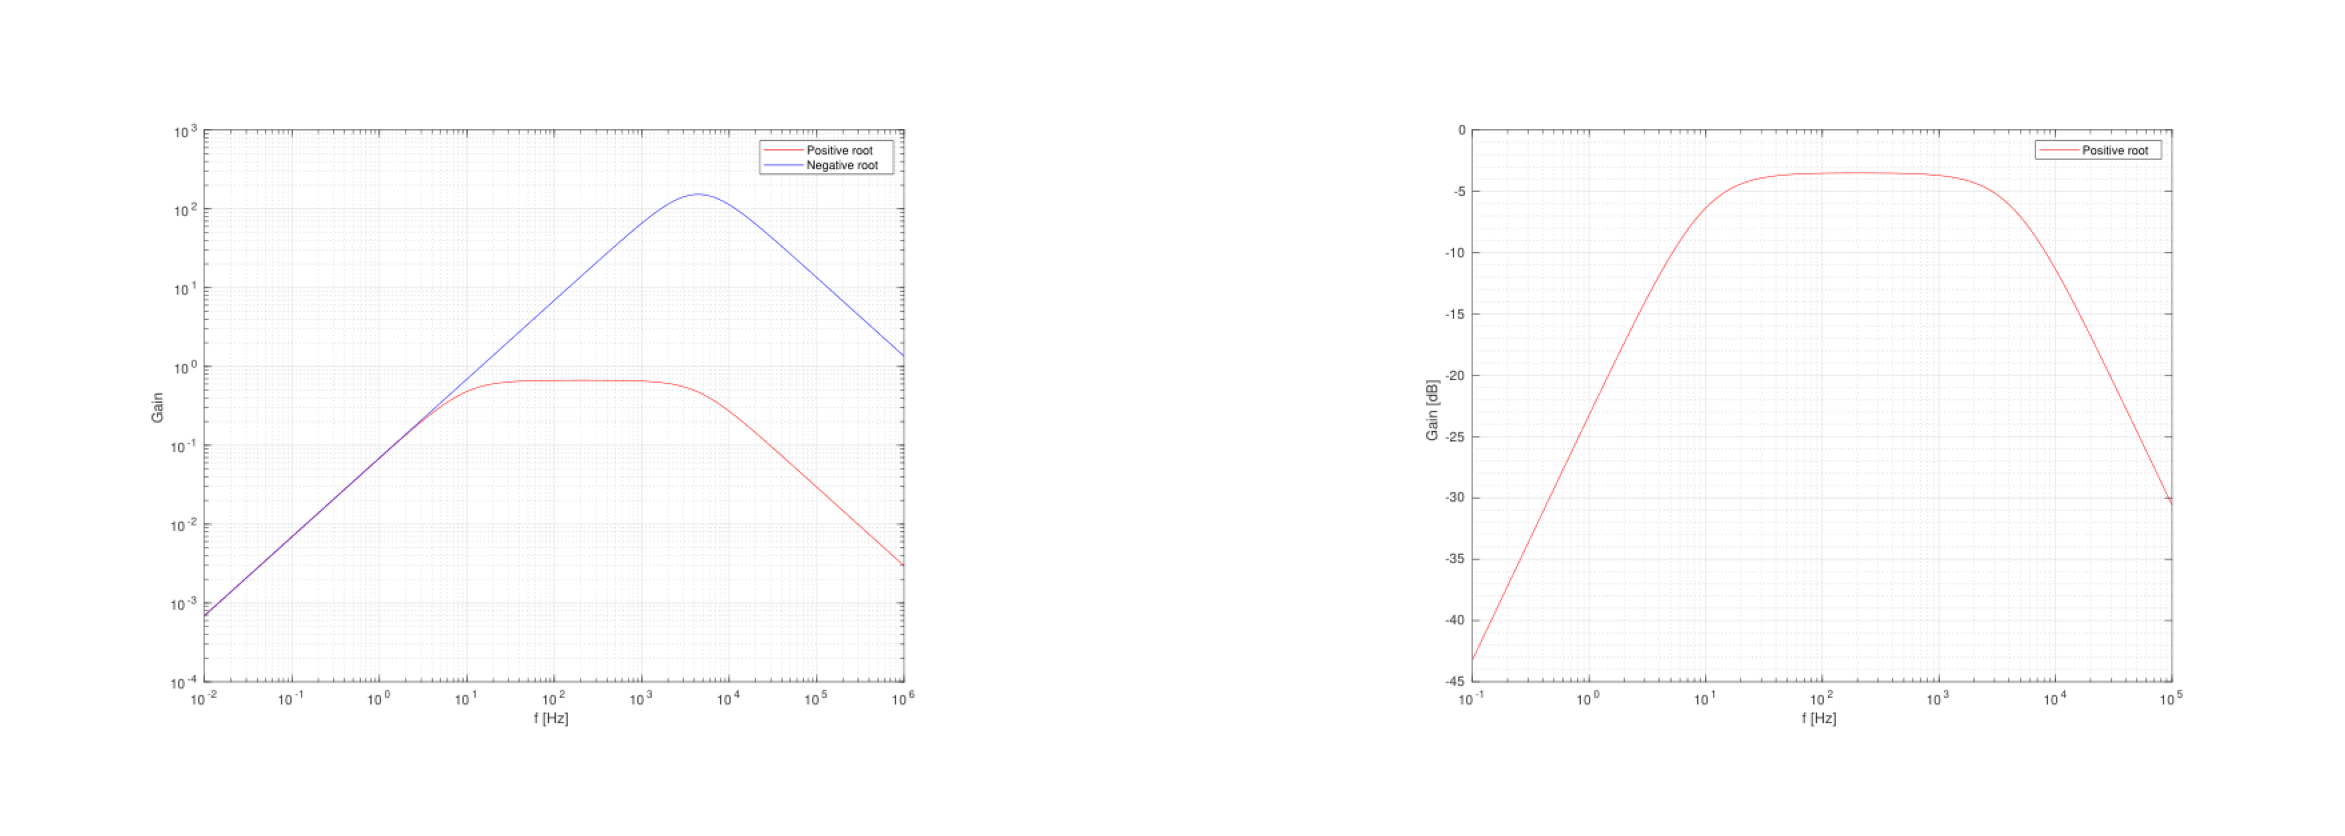

In [4]:
import fitz  # PyMuPDF
from PIL import Image
import matplotlib.pyplot as plt

# Function to convert a PDF page to an image
def pdf_page_to_image(pdf_path, page_num=0):
    pdf_document = fitz.open(pdf_path)
    page = pdf_document.load_page(page_num)  # Load the specified page
    pix = page.get_pixmap()  # Convert page to image
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    return img

# Function to display two PDF pages side by side
def display_pdfs_side_by_side(rows, cols, pdfList):
    # Convert all PDF pages to images
    imgList = []
    for pdf in pdfList:
        imgList.append(pdf_page_to_image(pdf))

    # Create a new figure for nxm subplots (n row, m columns)
    if cols == 1 and rows == 1:
        #img = pdf_page_to_image(pdf_path)
        plt.imshow(imgList[0])
        plt.axis('off')
        plt.show()
        return
    
    fig, axes = plt.subplots(rows, cols, figsize=(30, 15), squeeze=False)
    
    # Display the various images

    for i in range(rows):
        print(i)
        if cols == 1:
            axes[i].imshow(imgList[i])
            axes[i].axis('off')
        else:
            for j in range(cols):
                axes[i][j].imshow(imgList[i*cols+j])
                axes[i][j].axis('off')
    plt.show()


# Provide the paths to your two PDFs
pdfList = ['Media/gainPlots/gainPlotPure.pdf', 'Media/gainPlots/gainPlotdB.pdf']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)


### Simulazione circuito
Si è poi effettuata simulazione del circuito tramie software Tina ottenendo circuito e simulazine della risposta in frequenza, entrambe riportate sotto.
La simulazione della risposta in frequenza è stata importata in Matlab e sovrapposta alla simulazione numerica della funzione di trasferimento in maniera tale da effettuare un cross check.



0


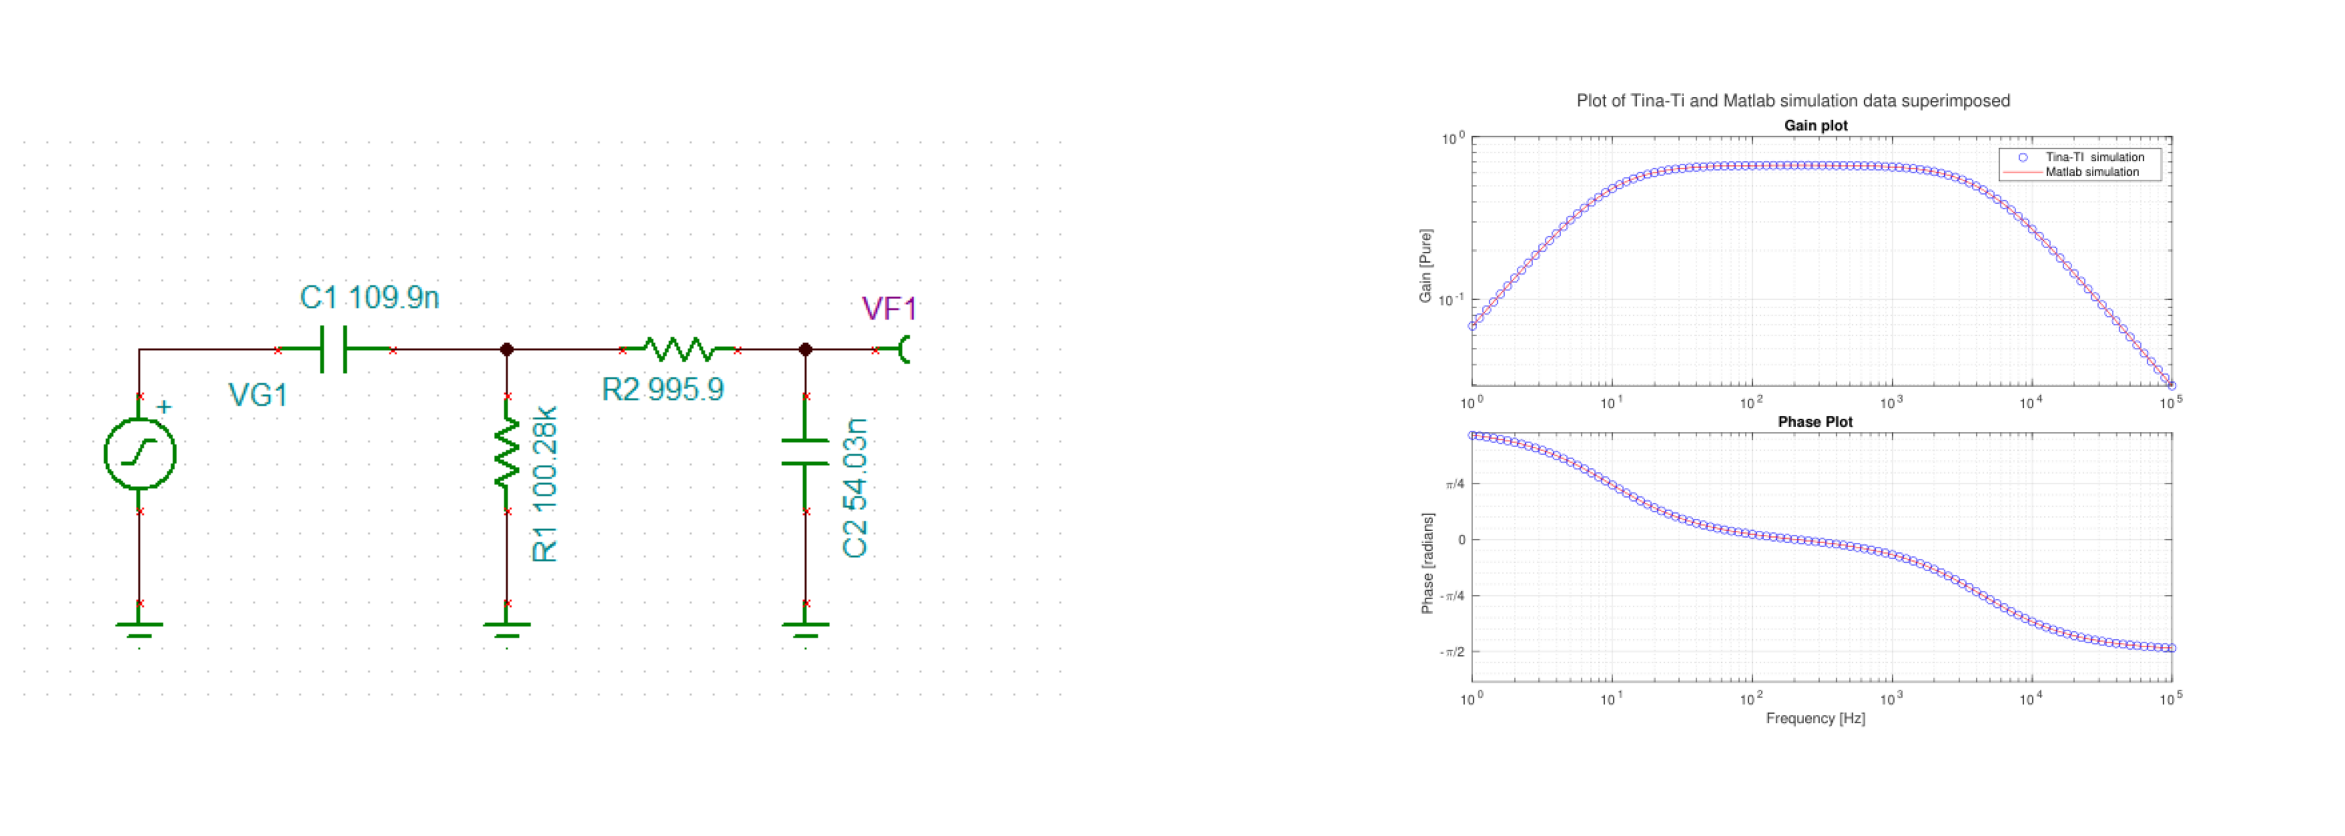

In [5]:
cols = 2
pdfList = ['Media/tina/circuitSimulation.pdf', 'Media/tina/Simulazioni_CRRC.pdf']
display_pdfs_side_by_side(rows, cols, pdfList)

Si nota come i due grafici, quello di Tina e quello di matlab con segno più sulla radice sono equivalenti, ciò ci porta a crede che il modello utilizzato, almeno entro i bound di simulazione, risulti corretto.

### Misure qualitative

Sono state effettuate prese dati qualitative con funzioni seno a diverse frequenza in maniera tale da controllare che il circuito fisico avesse comportamento simile a quello teorizzato, le prese dati sono riportate di seguito e sono state effettuate con i seguenti valori

<center>

| Misura | Frequency[Hz] |
| :-: | :-: |
| 001 | 5 |
| 002 | 5k |
| 003 | 50k |
</center>

Sono state effettaute anche misure alle stesse frequenze con forma d'onda quadra in modo tale da poter osservare gli effetti derivativi(integrativi) a basse(alte) frequenze in maniera più naturale.



0
1


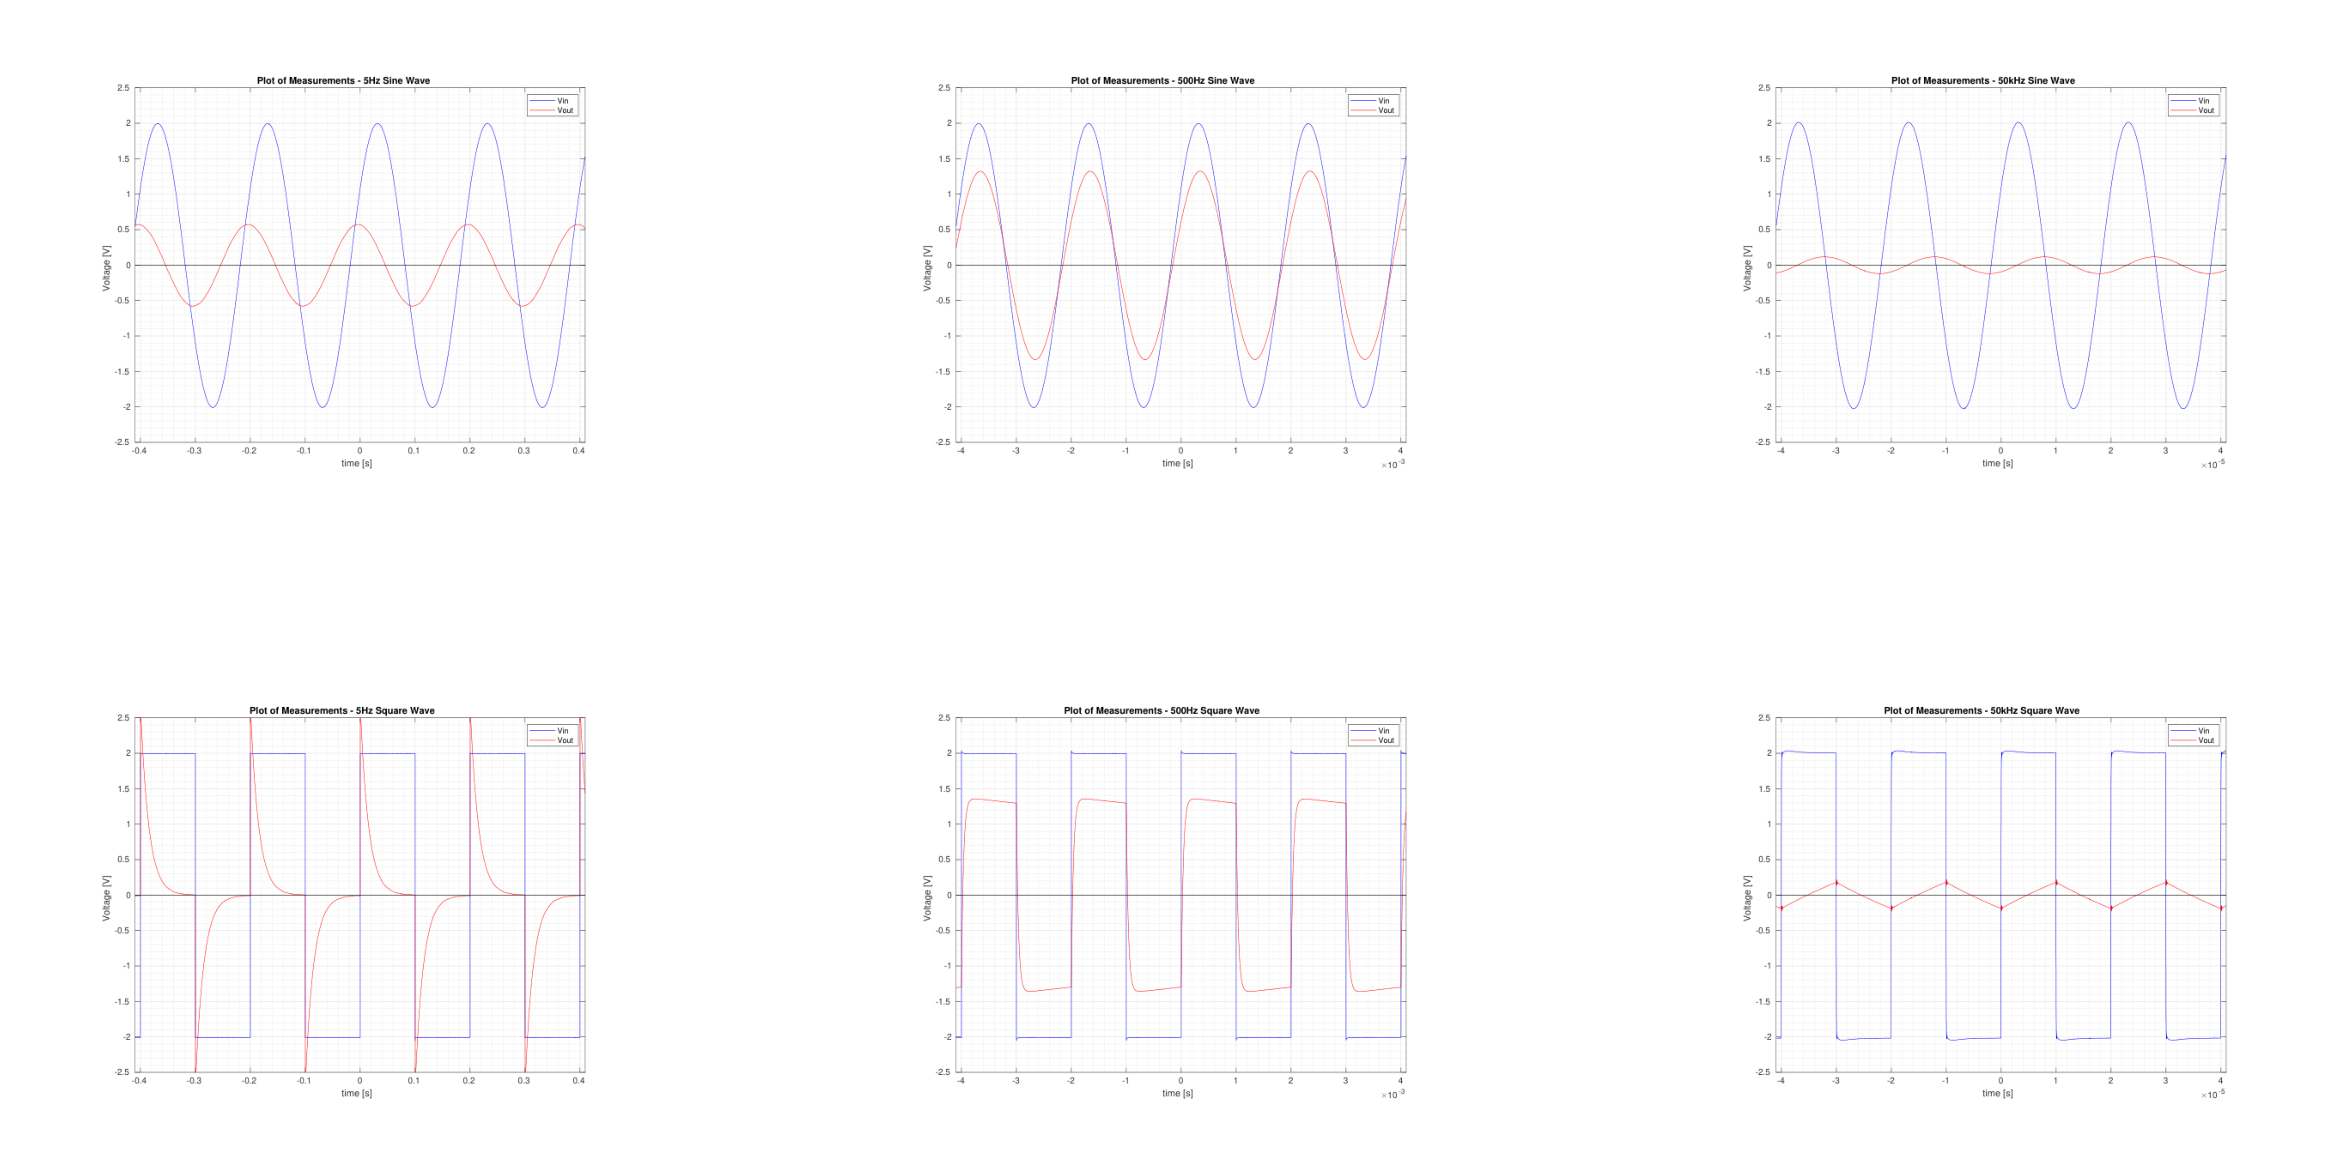

In [18]:
cols = 3
rows = 2
pdfList = ['Media/measurePlots/data001.pdf', 'Media/measurePlots/data002.pdf', 'Media/measurePlots/data003.pdf', 'Media/measurePlots/data004.pdf', 'Media/measurePlots/data005.pdf', 'Media/measurePlots/data006.pdf']
display_pdfs_side_by_side(rows, cols, pdfList)

Si può ben notare, sia nel caso sinusoidale ma ancora meglio in quello ad onda quadra, il comportamento del filtro a diverse frequenze. Mentre nel caso di stimulazione armonica si osserva molto bene l'efficacia come filtro passa banda e i ritardi introdotti, in quello a stimulazione quadra si osserve molto bene il comportamento derivante/integrante.

## Fit della funzione di trasferimento

Una volta ottenute delle misure su tutto lo span in frequenza del filtro può essere effettuato un fit della funzione di trasferimento del modello matematico con i dati sperimentali, e ciò è esattamente quanto è stato fatto successivamente.
Si sono ottenuti gli errori tramite varie misure in punti diversi e calcolando media e varainza di queste misure. Si è poi assunto che la varianza fosse la stessa tra tutte le misure come è su una singola misura, ottenendo il fit riportato di seguito.

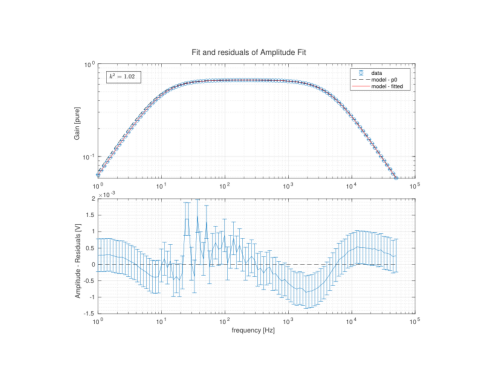

In [10]:
cols = 1
rows = 1
pdfList = ['Media/gainPlots/Misura_CRRC.pdf']
display_pdfs_side_by_side(rows, cols, pdfList)

Come si può notare il fit è risucito molto bene, ottenedo un $k^2_{red}$ molto vicino a uno, e i parametri fittati sono risultati essere $ \beta = [ 0.0101 \,\,\,\, 0.00 \,\,\,\,0.0152] $ rispettivamente per $ \tau_1 $, $ \tau_a $, $ \tau_b $.




## Analisi in trasformata di Fourier

Si è poi notato  come si possano analizzare i segnali raccolti tramite trasformata di Fourier discreta, ottenendo uno spettro delle varie componenti in frequenza del segnale.
Ovviamente la DFT dipenderà tanto dalla frequenza di campionamento quanto dalla durata del campionamento, e modificando questi parametri si possono ottenere risultati molto diversi, come ad esempio se la frequenza di campionamento fosse la stessa del segnale campionato, quest'ultimo apparirebbe costante nel tempo, come nel caso 3). Invece con campionamenti a frequenze molto più alte so è in grado di osservare armoniche a frequenze molto superiori senza grosse difficolta, come nel caso 1)

0


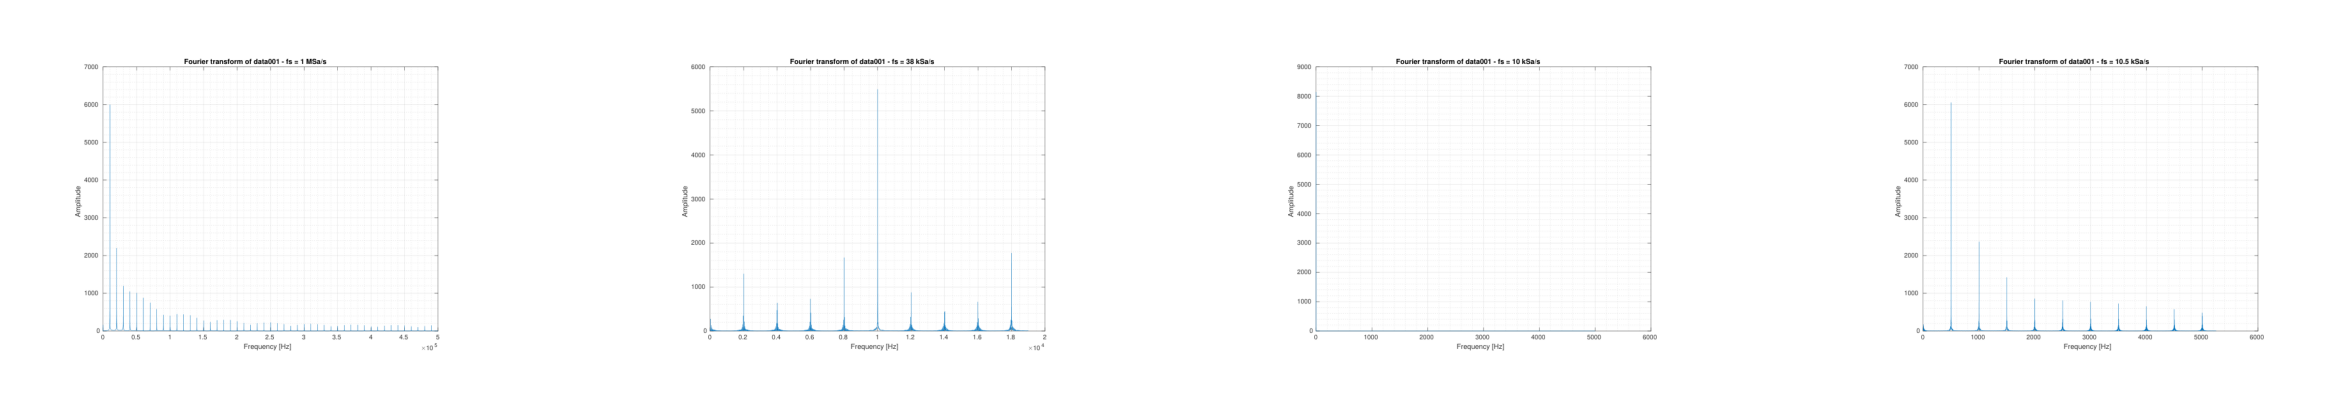

In [10]:
rows = 1
cols = 4
pdfList = ['Media/fourierPlot/dataFourier001.pdf', 'Media/fourierPlot/dataFourier002.pdf', 'Media/fourierPlot/dataFourier003.pdf', 'Media/fourierPlot/dataFourier004.pdf']
display_pdfs_side_by_side(rows, cols, pdfList)

Qui si può notare molto facilmente quanto riportato in precedenza, nei plot 1 e 2 si osserva senza alcun problema un picco a 10kHz, frequenza del segnale di ingresso, mentre nel plot 3 si osserva solo una componente a 0Hz, equivalente a dire che la presa dati presenta solo componente continua rilevante.

Invece per quanto riguarda la presa dati 4 si può osservare, in maniera molto interessante, che il picco principale si trova a 500Hz, effetto dovuto alla presenza di copie a frequenze negative, con armonica principale a -10kHz, i quali subiscono uno shift di 10.5kHz dovuto all'aliasing, equivalente a uno spostamento pari a fs frequenza di sampling, trovando così i vari fattori a multipli semi-interi di 10kHz.

Per osservare ancora meglio il fenomeno dell'aliasing però si è effettuato un plot delle trasformate dei dati 1 e 2 sovrapposte, zoommato sul'asse  delle frequenze.

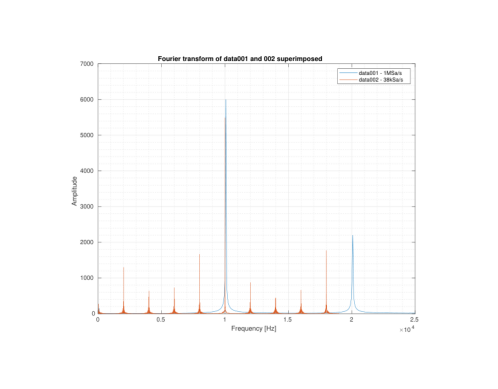

In [5]:
cols = 1
rows = 1
pdfList = ['Media/fourierPlot/aliasing.pdf']
#pdfList = ['Media/fourierPlot/aliasing.pdf', 'Media/gainPlots/gainPlotdB.pdf']
display_pdfs_side_by_side(rows, cols, pdfList)

Here it can be easily seen that, while the fourier analysis of data001, made with a sampling frequency of 1MSa/s shows only repetitions of the signal at integer multiples of the main harmonic, the one of data002 shows many other copies, those being aliases of higher order harmonics that have been shifted and brought around.

## Leakage Spettrale

Un artefatto della trasformata di Fourier, quando quest'ultima non è ben utilizzata, è il leakage spettrale, fenomeno nel quale le varie componenti in frequenza, non cadendo perfettamente sulle frequenze che la trasformata è in grado di mostrare, le quali, si vuole ricordare, sono discrete e finite a causa della natura discreta e finita del campionamento, mostra un'aumento generale delle componenti a frequenza "vicina" a quella esatta.

Ovviamente non possono esistere aumenti arbitrari, e l'ampiezza cumulativa di queste componenti, calcolata come somma in quadratura delle ampiezze a diverse frequenze, dovrà rimanere costante, almeno entro i limiti dati dalla presenza anche di aliasing e dalla limitata risoluzione dei dati.

Si effettua dunque una misura con fs tale da non coincidere perfettamente con la frequenza di base dei dati sperimentali, nel nostro caso fs = 17MSa/s, e, sovrapponendo questo segnale con quello data001, campionato a 1MSa/s, si può osservare come il picco del primo sia leggermente spostato e molto più largo di quello del secondo, seppur più basso.
Effettuando la misura con somma in quadratura si nota inoltre come tali somme appaiano molto vicine, almeno appunto entro i limiti di risoluzione delle misure.

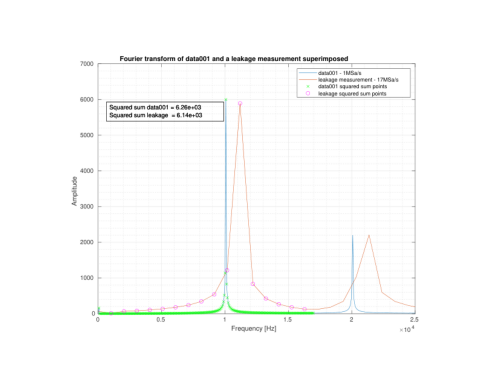

In [6]:
rows = 1
cols = 1
pdfList = ['Media/fourierPlot/leakage.pdf']
display_pdfs_side_by_side(rows, cols, pdfList)

## Misura Impulsata

Comep è ben noto, nel momento in cui un sistema lineare viene eccitato da un segnale a delta di dirac, data la relazione definente la distribuzione delta ossia $ \int_{-\infty}^{+\infty} \delta(x) \,dx = 1 $, si ottiene che la risposta del sistema, una volta trasformata tramite trasformata di Fourier, equivale alla funzione di trasferimento del sistema stesso.

Ciò è dovuto anche al fatto che la trasformata di Fourier di una funzione delta sia una funzione gradino, e contenga dunque componenti sino a frequenze infinite.
Ovviamente una funzione delta esatta non è possibile crearla realmente, tuttavia la si può ben approssimare sfruttando onde quadre a basso duty cycle.

Si ha da prendere in considerazione tuttavia alcuni problemi, principalmente che una funzione contenga solo componenti armoniche a frequenze multiple della frequenza principale, portando dunque alla necessità di una frequenza principale bassa( nel nostro caso 10Hz), che una trasformata di fourier, a causa del criterio di Nyquist-Shannon, non potrà mostrare componenti armoniche a frequenza maggiore o uguale la metà della frequenza di campionamento, portando dunque alla necessità di alte frequenze di campionamento( nel nostro caso, 1MSa/s) e in fine alla presenza di forte rumore dovuto all'abbattimento del segnale in uscita, problema che può essere mitigato tramite la rimozioni di segnali sotto un determinato threshold, nel nostro caso 0.6V, scelto una volta osservata la dinamica del segnale preso.

0


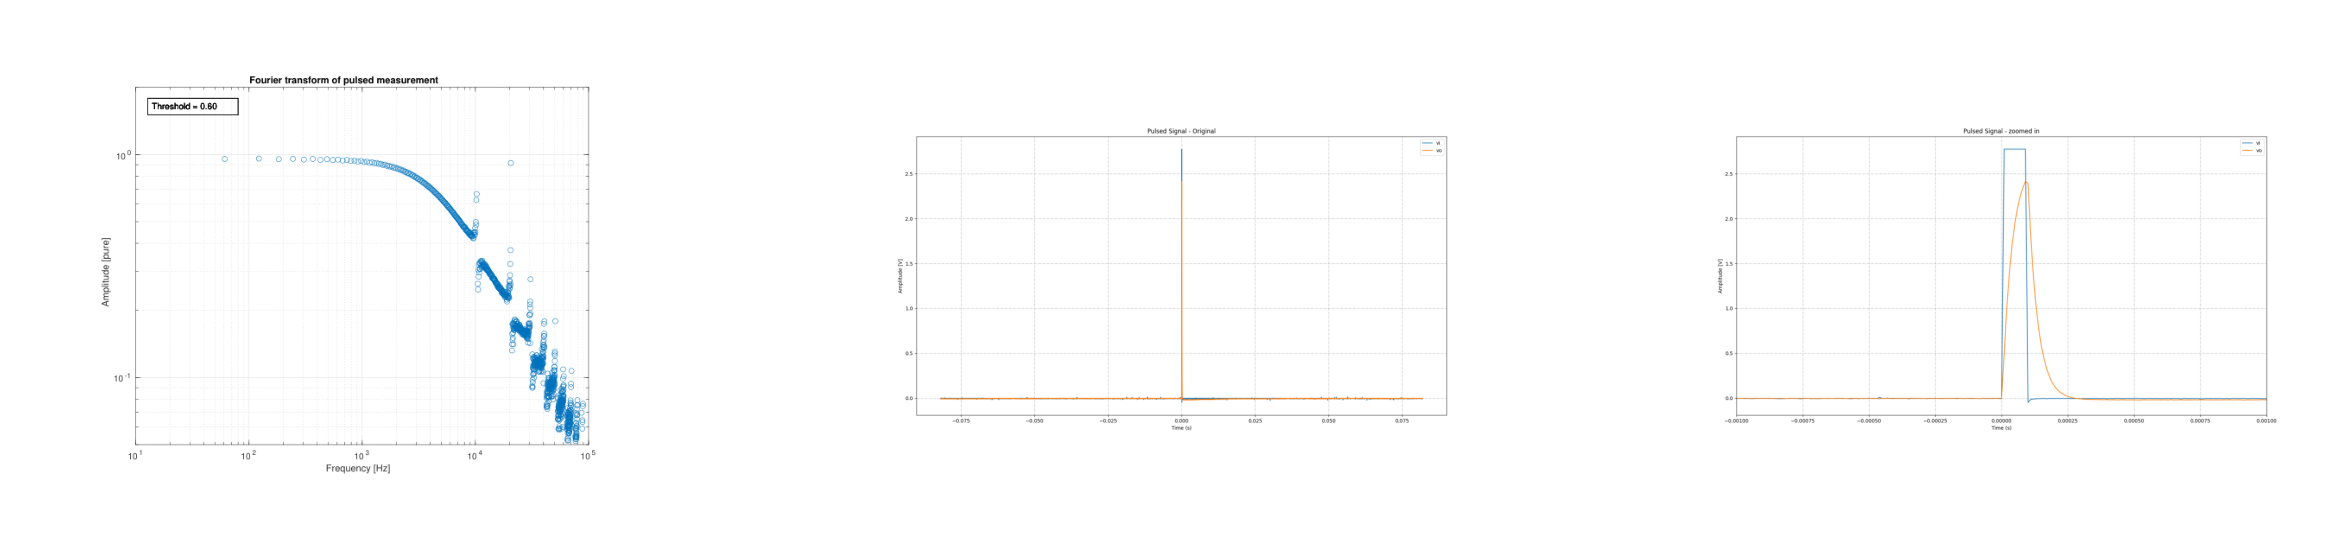

In [9]:
cols = 3
rows = 1
pdfList = ['Media/pulsed/MisuraImpulsata_CRRC.pdf', 'Media/pulsed/pulsedOriginal.pdf', 'Media/pulsed/pulsedZoomed.pdf']
display_pdfs_side_by_side(rows, cols, pdfList)